### Importing necessary libraries

In [29]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### Training data preprocessing 

In [20]:
X_train_data = pd.read_csv("train.csv")
X_train_data = X_train_data.dropna()
s = [[z for y in str(x).split('.') for z in y.strip("'").lower().split()] for x in X_train_data['Summary']]
X_train_data['Summary'] = s
s = [[z for y in str(x).split('.') for z in y.strip("'").lower().split()] for x in X_train_data['Text']]
X_train_data['Text'] = s
stop = ['a','an','the','and','this','that']
X_train_data['Summary'] = X_train_data['Summary'].apply(lambda x: [item for item in x if item not in stop])
X_train_data['Summary'] = X_train_data['Summary'].apply(', '.join)
X_train_data['Summary'] = X_train_data['Summary'].str.replace(',', '')
X_train_data['Text'] = X_train_data['Text'].apply(lambda x: [item for item in x if item not in stop])
X_train_data['Text'] = X_train_data['Text'].apply(', '.join)
X_train_data['Text'] = X_train_data['Text'].str.replace(',', '')
X_train_data['All_text'] = X_train_data['Summary'] + ' ' + X_train_data['Text']
print(X_train_data[['All_text','Score']])
X = X_train_data['All_text']
y = X_train_data['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                                 All_text  Score
0       great nature series but not all scenes looked ...    4.0
1       agatha christie's marple: series 2 as devoted ...    5.0
2       childish entertainment movie is about script w...    2.0
3       weakest babylon 5 season is weakest babylon 5 ...    4.0
4       versatile effective video will always have swe...    5.0
...                                                   ...    ...
125772  not what i expected (but in good way) going in...    5.0
125773  cute movie but drug use was disappointing kath...    3.0
125774  great murder mystery murders evolve around sev...    5.0
125775  fun movie like old tom hanks films apparently ...    5.0
125776  interesting story line ok so you have to read ...    5.0

[125775 rows x 2 columns]


### Pipelining and fitting 

RMSE:  0.9648565290476072


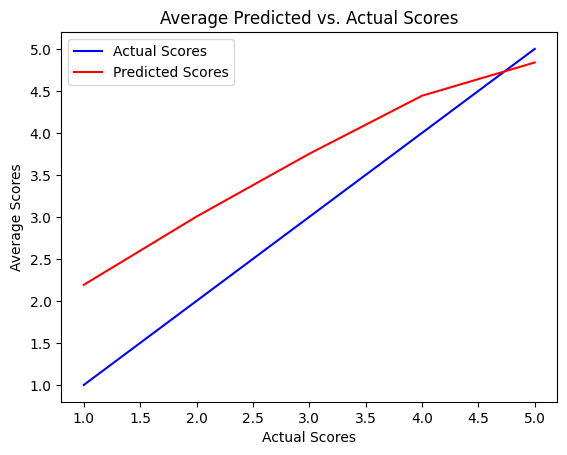

In [30]:
linear_svc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('linear_svc', LinearSVC(dual=False,C = 0.7)),
])

linear_svc.fit(X_train, y_train) 
predictions = linear_svc.predict(X_test)
print("RMSE: ", mean_squared_error(predictions,y_test,squared=False))
unique_scores = np.unique(y_test)
avg_actual_scores = []
avg_predicted_scores = []

for score in unique_scores:
    mask = y_test == score
    avg_actual_scores.append(np.mean(y_test[mask]))
    avg_predicted_scores.append(np.mean(predictions[mask]))

plt.plot(unique_scores, avg_actual_scores, color='blue', label='Actual Scores')
plt.plot(unique_scores, avg_predicted_scores, color='red', label='Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Average Scores')
plt.title('Average Predicted vs. Actual Scores')
plt.legend()
plt.show()

### Preprocessing the test data and combining with training data

In [17]:
train_new = pd.read_csv("train.csv")
testingSet = pd.read_csv("test.csv")
test_new = testingSet.merge(train_new, on='Id', how = 'left', suffixes=('test_data', 'train_new'))
test_text = test_new[['Id','Summary','Text']]
test_text['Summary'] = test_text['Summary'].astype(str)
test_text['Text'] = test_text['Text'].astype(str)
s = [[z for y in str(x).split('.') for z in y.strip("'").lower().split()] for x in test_text['Summary']]
test_text['Summary'] = s
s = [[z for y in str(x).split('.') for z in y.strip("'").lower().split()] for x in test_text['Text']]
test_text['Text'] = s
stop = ['a','an','the','and','this','that']
test_text['Summary'] = test_text['Summary'].apply(lambda x: [item for item in x if item not in stop])
test_text['Summary'] = test_text['Summary'].apply(', '.join) 
test_text['Summary'] = test_text['Summary'].str.replace(',', '')
test_text['Text'] = test_text['Text'].apply(lambda x: [item for item in x if item not in stop])
test_text['Text'] = test_text['Text'].apply(', '.join)
test_text['Text'] = test_text['Text'].str.replace(',', '')
test_text['All_text'] = test_text['Summary'] + ' ' + test_text['Text']
test_text = test_text[['Id','All_text']]

C:\Users\hanie\AppData\Local\Temp\ipykernel_33396\3830854137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_text['Summary'] = test_text['Summary'].astype(str)
C:\Users\hanie\AppData\Local\Temp\ipykernel_33396\3830854137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_text['Text'] = test_text['Text'].astype(str)
C:\Users\hanie\AppData\Local\Temp\ipykernel_33396\3830854137.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

            Id                                           All_text
0      1224650  sherlock holmes i bought thinking it was sherl...
1      1019381  fine singing destructive staging 1 scenic desi...
2       504719  moving story of jesus's message in modern rein...
3      1622425  paul anka has aged well performs well i was lo...
4       482286  great end to series or is it??????????? despit...
...        ...                                                ...
13971   316832  fantastic of course i have loved james bond fi...
13972   121619  great horror movie in my opinion is one of gre...
13973   869974  love it show is great i remembered seeing all ...
13974   177838  very good movie better on blu-ray i don't thin...
13975   299666  great movie though ending was little disappoin...

[13976 rows x 2 columns]


C:\Users\hanie\AppData\Local\Temp\ipykernel_33396\3830854137.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_text['Text'] = test_text['Text'].apply(lambda x: [item for item in x if item not in stop])
C:\Users\hanie\AppData\Local\Temp\ipykernel_33396\3830854137.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_text['Text'] = test_text['Text'].apply(', '.join)
C:\Users\hanie\AppData\Local\Temp\ipykernel_33396\3830854137.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of

### Prediciting score of test data 

In [18]:
predictions = linear_svc.predict(test_text['All_text'])
submission = pd.DataFrame({'Id':test_text['Id'],'Score':predictions})
common = test_new.merge(submission,on=['Id'])
common=test_new[(~test_new['Id'].isin(common['Id']))]
common_id_score = common[['Id','Scoretest_data']]
common_id_score = common_id_score.rename(columns = {"Scoretest_data":"Score"})
submission_new = submission.append(common_id_score)
submission_new['Score'].fillna((submission_new['Score'].mean()), inplace=True)
filename_2 = 'Submission.csv'
submission_new.to_csv(filename_2,index=False)

C:\Users\hanie\AppData\Local\Temp\ipykernel_33396\2595429665.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  submission_new = submission.append(common_id_score)
